In [1]:
import pandas as pd
import numpy as np
import json
from pandas import json_normalize
# from google.colab import files
import pyarrow.parquet as pq
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df22 = pd.read_parquet('data/transaction_2022.parquet')
df23 = pd.read_parquet('data/transaction_2023.parquet')
df_all = pd.concat([df22, df23])
df_all.ent.nunique()

325436

In [3]:
df_1Q22_seg = pd.read_parquet('data/df_1Q22_seg.parquet')
df_2Q22_seg = pd.read_parquet('data/df_2Q22_seg.parquet')
df_3Q22_seg = pd.read_parquet('data/df_3Q22_seg.parquet')
df_4Q22_seg = pd.read_parquet('data/df_4Q22_seg.parquet')
df_1Q23_seg = pd.read_parquet('data/df_1Q23_seg.parquet')
df_2Q23_seg = pd.read_parquet('data/df_2Q23_seg.parquet')

In [4]:
df_1Q22_seg.reset_index(inplace=True)
df_2Q22_seg.reset_index(inplace=True)
df_3Q22_seg.reset_index(inplace=True)
df_4Q22_seg.reset_index(inplace=True)
df_1Q23_seg.reset_index(inplace=True)
df_2Q23_seg.reset_index(inplace=True)
df_2Q23_seg.head()

,ent,frequency,Avg_spend,Avg_Discount,mtbp,online_ratio,Clusters,Segment
0,8CCCCCC4R1F,1,367500.0,0.675676,1.0,1.00,2,Online Value Shoppers
1,BC14413K,1,1118000.0,8.210181,1.0,0.00,1,Occasional Big-Spenders
2,BCCCCRE3C4F,1,335000.0,0.000000,1.0,1.00,2,Online Value Shoppers
3,BCCCCREW3WY,4,469750.0,23.495370,20.0,0.75,0,Loyal High-Spenders
4,BCE4JERY,4,1687250.0,0.000000,15.0,0.00,0,Loyal High-Spenders


In [5]:
df_1Q22 = df_1Q22_seg[['ent', 'Segment']]
df_2Q22 = df_2Q22_seg[['ent', 'Segment']]
df_3Q22 = df_3Q22_seg[['ent', 'Segment']]
df_4Q22 = df_4Q22_seg[['ent', 'Segment']]
df_1Q23 = df_1Q23_seg[['ent', 'Segment']]
df_2Q23 = df_2Q23_seg[['ent', 'Segment']]

df_1Q22.rename(columns={'Segment': '1Q22'}, inplace=True)
df_2Q22.rename(columns={'Segment': '2Q22'}, inplace=True)
df_3Q22.rename(columns={'Segment': '3Q22'}, inplace=True)
df_4Q22.rename(columns={'Segment': '4Q22'}, inplace=True)
df_1Q23.rename(columns={'Segment': '1Q23'}, inplace=True)
df_2Q23.rename(columns={'Segment': '2Q23'}, inplace=True)

In [6]:
# merge all data
df_merge = pd.merge(df_1Q22, df_2Q22, on='ent', how='outer')
df_merge = pd.merge(df_merge, df_3Q22, on='ent', how='outer')
df_merge = pd.merge(df_merge, df_4Q22, on='ent', how='outer')
df_merge = pd.merge(df_merge, df_1Q23, on='ent', how='outer')
df_merge = pd.merge(df_merge, df_2Q23, on='ent', how='outer')
df_merge

,ent,1Q22,2Q22,3Q22,4Q22,1Q23,2Q23
0,884R4EJZ0,Occasional Big-Spenders,NaN,NaN,NaN,NaN,NaN
1,884RC4REI,Frequent Online Shoppers,NaN,NaN,NaN,NaN,NaN
2,8C4ECCCC44F,Occasional Big-Spenders,NaN,NaN,NaN,NaN,NaN
3,8CC1CCCC3E0,Online Value Shoppers,NaN,NaN,NaN,NaN,NaN
4,8CCCCCC4R1F,Occasional Big-Spenders,NaN,NaN,Frequent Online Shoppers,Occasional Big-Spenders,Online Value Shoppers
...,...,...,...,...,...,...,...
324374,TZRRCZ3I,NaN,NaN,NaN,NaN,NaN,Occasional Big-Spenders
324375,TZZ1ZCCP,NaN,NaN,NaN,NaN,NaN,Occasional Big-Spenders
324376,TZZCWJ3Y,NaN,NaN,NaN,NaN,NaN,Loyal High-Spenders
324377,TZZRJR4B,NaN,NaN,NaN,NaN,NaN,Occasional Big-Spenders


In [7]:
df_merge.isna().sum()

ent          0
1Q22    190949
2Q22    231326
3Q22    241064
4Q22    230712
1Q23    261758
2Q23    257387
dtype: int64

In [8]:
# fill na with 4 (Churn or Inactive)
df_merge.fillna('Churn/Inactive', inplace=True)
df_merge.to_csv('data/seg_kmean_all.csv', index=False)
df_merge.head()


,ent,1Q22,2Q22,3Q22,4Q22,1Q23,2Q23
0,884R4EJZ0,Occasional Big-Spenders,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive
1,884RC4REI,Frequent Online Shoppers,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive
2,8C4ECCCC44F,Occasional Big-Spenders,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive
3,8CC1CCCC3E0,Online Value Shoppers,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive,Churn/Inactive
4,8CCCCCC4R1F,Occasional Big-Spenders,Churn/Inactive,Churn/Inactive,Frequent Online Shoppers,Occasional Big-Spenders,Online Value Shoppers


# Customer Segment Movement

In [9]:
# customer movement 
df_move = df_merge.copy() 
df_move.drop(columns=['ent'], inplace=True)
df_move_1Q22_2Q22 = df_move[['1Q22', '2Q22']]
df_move_2Q22_3Q22 = df_move[['2Q22', '3Q22']]
df_move_3Q22_4Q22 = df_move[['3Q22', '4Q22']]
df_move_4Q22_1Q23 = df_move[['4Q22', '1Q23']]
df_move_1Q23_2Q23 = df_move[['1Q23', '2Q23']]

df_move_1Q22_2Q22['count'] = 0
df_move_2Q22_3Q22['count'] = 0
df_move_3Q22_4Q22['count'] = 0
df_move_4Q22_1Q23['count'] = 0
df_move_1Q23_2Q23['count'] = 0

df_move_1Q22_2Q22 = df_move_1Q22_2Q22.groupby(['1Q22', '2Q22']).count().reset_index()
df_move_2Q22_3Q22 = df_move_2Q22_3Q22.groupby(['2Q22', '3Q22']).count().reset_index()
df_move_3Q22_4Q22 = df_move_3Q22_4Q22.groupby(['3Q22', '4Q22']).count().reset_index()
df_move_4Q22_1Q23 = df_move_4Q22_1Q23.groupby(['4Q22', '1Q23']).count().reset_index()
df_move_1Q23_2Q23 = df_move_1Q23_2Q23.groupby(['1Q23', '2Q23']).count().reset_index()

In [10]:
df_move_1Q23_2Q23

,1Q23,2Q23,count
0,Churn/Inactive,Churn/Inactive,224128
1,Churn/Inactive,Frequent Online Shoppers,8141
2,Churn/Inactive,Loyal High-Spenders,4028
3,Churn/Inactive,Occasional Big-Spenders,14538
4,Churn/Inactive,Online Value Shoppers,10923
5,Frequent Online Shoppers,Churn/Inactive,6492
6,Frequent Online Shoppers,Frequent Online Shoppers,5093
7,Frequent Online Shoppers,Loyal High-Spenders,2498
8,Frequent Online Shoppers,Occasional Big-Spenders,1019
9,Frequent Online Shoppers,Online Value Shoppers,2061


In [11]:
# to excel
df_move_1Q22_2Q22.to_excel('data/df_move_1Q22_2Q22.xlsx', index=False)
df_move_2Q22_3Q22.to_excel('data/df_move_2Q22_3Q22.xlsx', index=False)
df_move_3Q22_4Q22.to_excel('data/df_move_3Q22_4Q22.xlsx', index=False)
df_move_4Q22_1Q23.to_excel('data/df_move_4Q22_1Q23.xlsx', index=False)
df_move_1Q23_2Q23.to_excel('data/df_move_1Q23_2Q23.xlsx', index=False)

# Customer Segmentation Number

In [12]:
# find number of customers in each segment in each period
df_count_1Q22 = pd.DataFrame(df_merge['1Q22'].value_counts())
df_count_2Q22 = pd.DataFrame(df_merge['2Q22'].value_counts())
df_count_3Q22 = pd.DataFrame(df_merge['3Q22'].value_counts())
df_count_4Q22 = pd.DataFrame(df_merge['4Q22'].value_counts())
df_count_1Q23 = pd.DataFrame(df_merge['1Q23'].value_counts())
df_count_2Q23 = pd.DataFrame(df_merge['2Q23'].value_counts())

# concat all data
df_count = pd.concat([df_count_1Q22, df_count_2Q22, df_count_3Q22, df_count_4Q22, df_count_1Q23, df_count_2Q23], axis=1)
df_count.columns = ['1Q22', '2Q22', '3Q22', '4Q22', '1Q23', '2Q23']
df_count.to_excel('data/Customer_Segmentation_Movement.xlsx')
df_count

,1Q22,2Q22,3Q22,4Q22,1Q23,2Q23
Churn/Inactive,190949,231326,241064,230712,261758,257387
Occasional Big-Spenders,53309,38954,33035,29448,19666,18919
Frequent Online Shoppers,40553,20753,17892,28418,17163,17774
Online Value Shoppers,27800,19125,17141,24818,16289,16606
Loyal High-Spenders,11768,14221,15247,10983,9503,13693


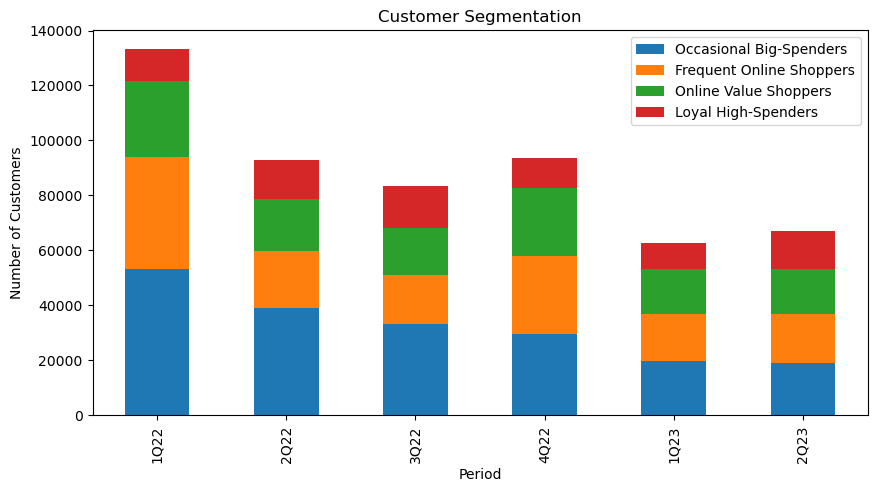

In [13]:
# stack plot
df_count.drop(['Churn/Inactive']).T.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Customer Segmentation')
plt.xlabel('Period')
plt.ylabel('Number of Customers')
plt.show()

# Sales by Customer Segmentation

In [14]:
df_1Q22_rev = df_1Q22_seg[['ent', 'Clusters', 'frequency', 'Avg_spend']]
df_1Q22_rev['total_spend'] = df_1Q22_rev['frequency'] * df_1Q22_rev['Avg_spend']

df_2Q22_rev = df_2Q22_seg[['ent', 'Clusters', 'frequency', 'Avg_spend']]
df_2Q22_rev['total_spend'] = df_2Q22_rev['frequency'] * df_2Q22_rev['Avg_spend']

df_3Q22_rev = df_3Q22_seg[['ent', 'Clusters', 'frequency', 'Avg_spend']]
df_3Q22_rev['total_spend'] = df_3Q22_rev['frequency'] * df_3Q22_rev['Avg_spend']

df_4Q22_rev = df_4Q22_seg[['ent', 'Clusters', 'frequency', 'Avg_spend']]
df_4Q22_rev['total_spend'] = df_4Q22_rev['frequency'] * df_4Q22_rev['Avg_spend']

df_1Q23_rev = df_1Q23_seg[['ent', 'Clusters', 'frequency', 'Avg_spend']]
df_1Q23_rev['total_spend'] = df_1Q23_rev['frequency'] * df_1Q23_rev['Avg_spend']

df_2Q23_rev = df_2Q23_seg[['ent', 'Clusters', 'frequency', 'Avg_spend']]
df_2Q23_rev['total_spend'] = df_2Q23_rev['frequency'] * df_2Q23_rev['Avg_spend']


In [21]:
df_rev = pd.DataFrame(df_1Q22_rev.groupby('Clusters')['total_spend'].sum())
df_rev.rename(columns={'total_spend': '1Q22'}, inplace=True)
df_rev['2Q22'] = df_2Q22_rev.groupby('Clusters')['total_spend'].sum()
df_rev['3Q22'] = df_3Q22_rev.groupby('Clusters')['total_spend'].sum()
df_rev['4Q22'] = df_4Q22_rev.groupby('Clusters')['total_spend'].sum()
df_rev['1Q23'] = df_1Q23_rev.groupby('Clusters')['total_spend'].sum()
df_rev['2Q23'] = df_2Q23_rev.groupby('Clusters')['total_spend'].sum()

# map segment
seg_map = {0: 'Loyal High-Spenders', 1: 'Occasional Big-Spenders',
              2: 'Online Value Shoppers', 3: 'Frequent Online Shoppers'}
df_rev['Segment'] = df_rev.index.map(seg_map)
df_rev.set_index('Segment', inplace=True)
df_rev.to_excel('data/Customer_Segmentation_Movement_Revenue.xlsx')
df_rev



,1Q22,2Q22,3Q22,4Q22,1Q23,2Q23
Segment,,,,,,
Loyal High-Spenders,6.231025e+10,6.801705e+10,7.299915e+10,5.334728e+10,4.638533e+10,5.870609e+10
Occasional Big-Spenders,9.022178e+10,6.637482e+10,5.564004e+10,4.892659e+10,3.317347e+10,3.093086e+10
Online Value Shoppers,2.361096e+10,1.379548e+10,1.121248e+10,2.172723e+10,1.043589e+10,1.048445e+10
Frequent Online Shoppers,1.078571e+11,4.470778e+10,3.670642e+10,6.568513e+10,3.570833e+10,3.698599e+10


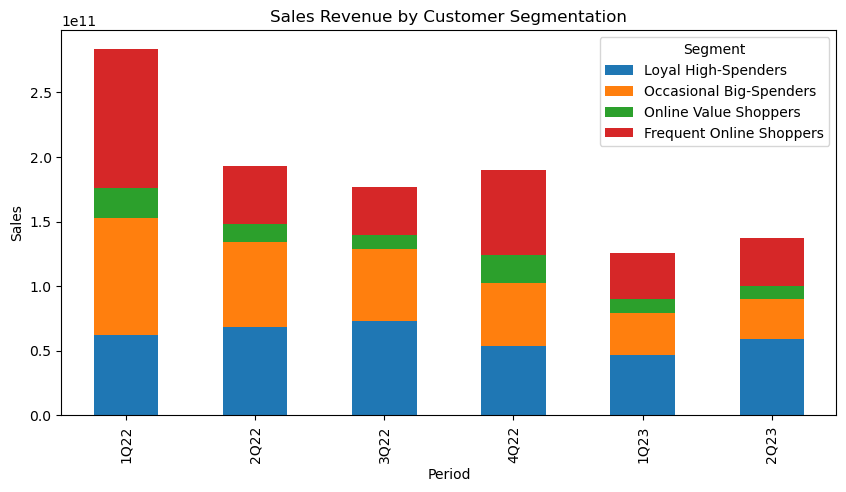

In [22]:
# stack plot
df_rev.T.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Sales Revenue by Customer Segmentation')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.show()


# Sales Proportion

In [18]:
df_rev_pct = df_rev.copy()
df_rev_pct['1Q22'] = df_rev_pct['1Q22'] / df_rev_pct['1Q22'].sum()
df_rev_pct['2Q22'] = df_rev_pct['2Q22'] / df_rev_pct['2Q22'].sum()
df_rev_pct['3Q22'] = df_rev_pct['3Q22'] / df_rev_pct['3Q22'].sum()
df_rev_pct['4Q22'] = df_rev_pct['4Q22'] / df_rev_pct['4Q22'].sum()
df_rev_pct['1Q23'] = df_rev_pct['1Q23'] / df_rev_pct['1Q23'].sum()
df_rev_pct['2Q23'] = df_rev_pct['2Q23'] / df_rev_pct['2Q23'].sum()
df_rev_pct.to_excel('data/Customer_Segmentation_Movement_Revenue_Pct.xlsx')
df_rev_pct

,1Q22,2Q22,3Q22,4Q22,1Q23,2Q23
Segment,,,,,,
Loyal High-Spenders,0.219402,0.352612,0.413457,0.281240,0.369007,0.428176
Occasional Big-Spenders,0.317682,0.344098,0.315137,0.257934,0.263904,0.225596
Online Value Shoppers,0.083137,0.071518,0.063506,0.114543,0.083020,0.076469
Frequent Online Shoppers,0.379778,0.231772,0.207900,0.346283,0.284069,0.269759


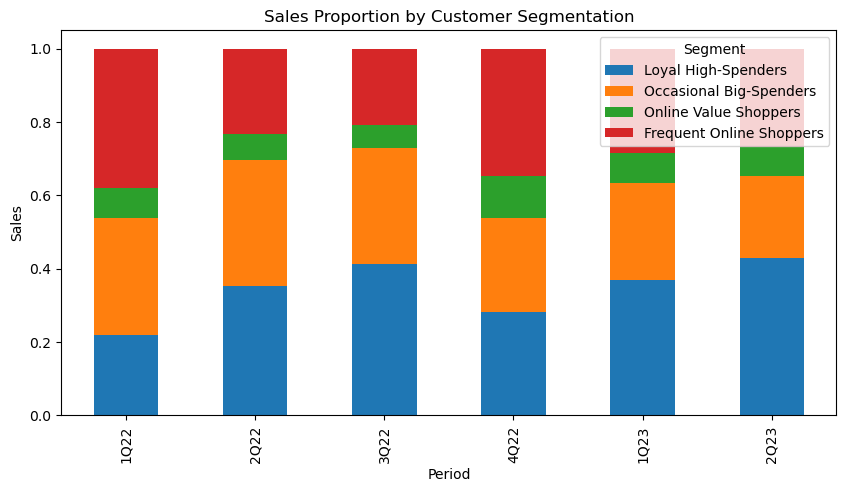

In [19]:
# stack plot
df_rev_pct.T.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Sales Proportion by Customer Segmentation')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.show()
